In [1]:
#imports
from PIL import Image
import numpy as np
import os
import random
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm

#constants
PATH_OF_IMAGES = './data/simulator/IMG'
PATH_OF_CSV = './data/simulator/driving_log.csv'
IMAGE_TYPE = 'center'


In [2]:
# read CSV data
def readCsv():
    data = []
    with open(PATH_OF_CSV) as F:
        reader = csv.reader(F)
        for i in reader:
            data.append(i) 
    print('{0} images available in training data'.format(len(data)))
    #print("Imported {0} rows from CSV".format(len(data)))
    return data



In [3]:
### This function will resize the images from front, left and
### right camera to 18 x 80 and turn them into lists.
### The length of the each list will be 18 x 80 = 1440
### j = 0,1,2 corresponds to center, left, right
def load_image(csvRow, jj):
    image = plt.imread(csvRow[jj].strip())[65:135:4,0:-1:4,0]
    image_list = image.flatten().tolist()
    return image_list

csvData = readCsv()
load_image(csvData[0], 1)

323 images available in training data


[110,
 112,
 115,
 137,
 139,
 149,
 155,
 147,
 146,
 158,
 167,
 162,
 158,
 153,
 89,
 13,
 199,
 255,
 157,
 141,
 129,
 139,
 108,
 133,
 151,
 111,
 125,
 201,
 183,
 164,
 170,
 166,
 119,
 117,
 164,
 160,
 158,
 182,
 100,
 115,
 115,
 90,
 89,
 92,
 71,
 34,
 56,
 59,
 53,
 67,
 66,
 78,
 37,
 5,
 16,
 48,
 37,
 54,
 1,
 35,
 10,
 27,
 22,
 65,
 44,
 32,
 0,
 38,
 35,
 19,
 29,
 79,
 111,
 86,
 98,
 111,
 108,
 94,
 81,
 90,
 135,
 137,
 138,
 143,
 143,
 149,
 150,
 153,
 143,
 162,
 151,
 174,
 113,
 128,
 153,
 253,
 247,
 250,
 255,
 255,
 255,
 245,
 138,
 144,
 140,
 136,
 124,
 139,
 127,
 128,
 124,
 130,
 106,
 127,
 131,
 134,
 228,
 212,
 198,
 156,
 123,
 102,
 61,
 97,
 169,
 183,
 116,
 126,
 118,
 119,
 102,
 113,
 110,
 114,
 107,
 93,
 108,
 100,
 111,
 109,
 111,
 107,
 13,
 70,
 58,
 85,
 78,
 26,
 31,
 32,
 39,
 83,
 93,
 91,
 25,
 15,
 34,
 81,
 103,
 92,
 152,
 169,
 104,
 100,
 147,
 154,
 141,
 152,
 109,
 90,
 161,
 255,
 247,
 253,
 250,
 249,
 253,


In [4]:
from tqdm import tqdm

### Emtpy generators for feature and labels
features = ()
labels = ()

# For each item in data, convert camera images to single list
# and save them into features list.
for i in tqdm(range(int(len(csvData))), unit='items'):
    for j in range(3):
        features += (load_image(csvData[i],j),)

item_num = len(features)
print("features size", item_num)


100%|██████████| 323/323 [00:00<00:00, 348.35items/s]    | 35/323 [00:00<00:00, 340.20items/s]

features size 969


In [5]:
# A single list will be convert back to the original image shapes.
# Each list contains 3 images so the shape of the result will be
# 54 x 80 where 3 images aligned vertically.
features = np.array(features).reshape(item_num, 18, 80, 1)
print("features shape", features.shape)

features shape (969, 18, 80, 1)


In [6]:
### Save labels    
for i in tqdm(range(int(len(csvData))), unit='items'):
    for j in range(3):
        labels += (float(csvData[i][3]),)

labels = np.array(labels)

print("features:", features.shape)
print("labels:", labels.shape)

  0%|          | 0/323 [00:00<?, ?items/s]100%|██████████| 323/323 [00:00<00:00, 161781.73items/s]

features: (969, 18, 80, 1)
labels: (969,)


In [7]:
def plotRandomImage(image_array, angle_array):
    X_random_16 = np.random.choice(len(image_array), 8)
    plt.figure(figsize=(16,6))
    for ii,idx in enumerate(X_random_16):
        plt.subplot(4,4, ii+1)
        plt.axis('off')
        plt.title('Angle: {}'.format(angle_array[idx]))
        plt.imshow(np.squeeze(image_array[idx], axis=2))

#create histogram of y
#display min,max steering and image
def plotMinMax(image_array, angle_array):
    y_train_min = np.argmin(angle_array)
    y_train_max = np.argmax(angle_array)
    plt.figure(figsize=(16,8))
    plt.subplot(1,2, 1)
    plt.axis('off')
    plt.imshow(np.squeeze(image_array[y_train_min], axis=2))
    plt.title('Minimum Angle: {}'.format(angle_array[y_train_min]))
    plt.subplot(1,2, 2)
    plt.axis('off')
    plt.title('Maximum Angle: {}'.format(angle_array[y_train_max]))
    plt.imshow(np.squeeze(image_array[y_train_max], axis=2))

    
def plotYHistorygram(labels):
#     print(np.unique(labels))
    plt.figure(figsize=(16,8))
    hist = plt.hist(labels, bins='auto')  # plt.hist passes it's arguments to np.histogram
#     plt.title("Histogram with 'auto' bins")
#     plt.show()        
    print(hist)

(array([ 969.]), array([-1.,  1.]), <a list of 1 Patch objects>)


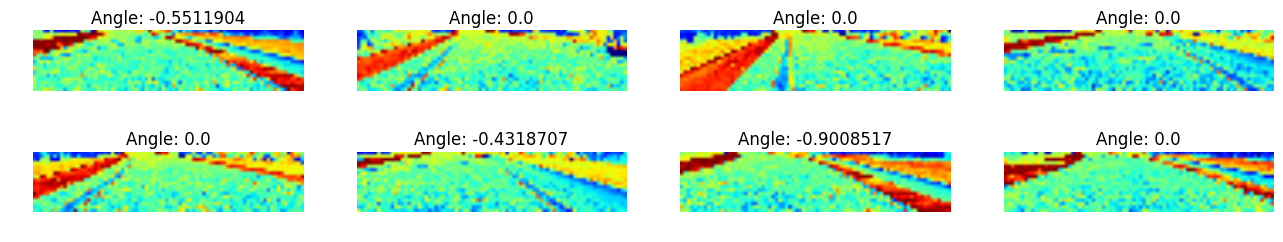

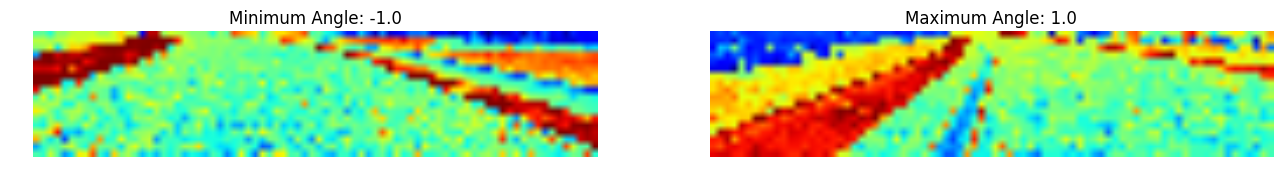

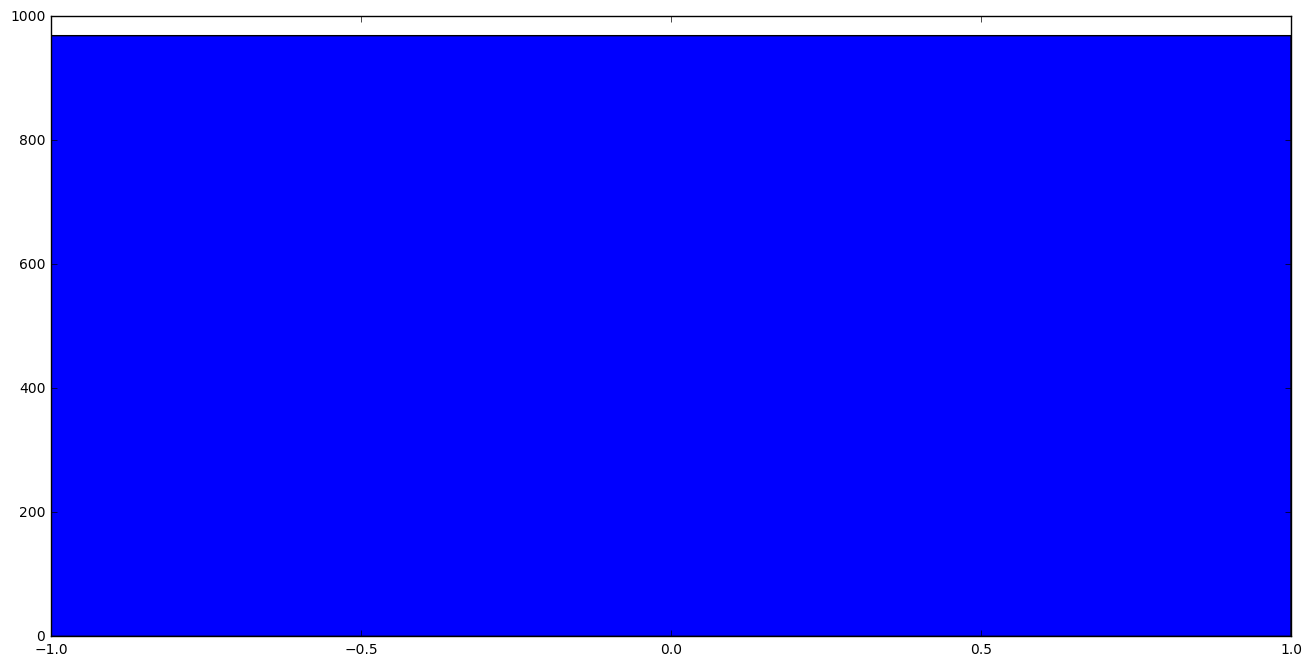

In [8]:
plotRandomImage(features, labels)
plotMinMax(features, labels)
plotYHistorygram(labels)

## Preprocess training data


In [9]:
#Split the data into training/validation/testing sets here.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
    features, labels, test_size=0.10, random_state=42)

print('Shape of training images {}', X_train.shape)
print('Shape of validation images {}', X_test.shape)



#Shuffling training data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

Shape of training images {} (872, 18, 80, 1)
Shape of validation images {} (97, 18, 80, 1)


In [10]:
# Get randomized datasets for training and validation
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train,
    y_train,
    test_size=0.25,
    random_state=434339)

print('Shape of  train images {}', X_train.shape)
print('Shape of validation images {}', X_validation.shape)


Shape of  train images {} (654, 18, 80, 1)
Shape of validation images {} (218, 18, 80, 1)


In [11]:
# Print out shapes of new arrays
train_size = X_train.shape[0]
test_size = X_test.shape[0]
valid_size = X_validation.shape[0]
input_shape = X_train.shape[1:]
features_count = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]

print("train size:", train_size)
print("valid size:", valid_size)
print("test size:", test_size)
print("input_shape:", input_shape)
print("features count:", features_count)

train size: 654
valid size: 218
test size: 97
input_shape: (18, 80, 1)
features count: 1440


In [12]:
import pickle

# Save the data for easy access
pickle_file = 'camera.pickle'
stop = False

while not stop:
    if not os.path.isfile(pickle_file):
        print('Saving data to pickle file...')
        try:
            with open(pickle_file, 'wb') as pfile:
                pickle.dump(
                    {
                        'train_dataset': X_train,
                        'train_labels': y_train,
                        'valid_dataset': X_validation,
                        'valid_labels': y_validation,
                        'test_dataset': X_test,
                        'test_labels': y_test,
                    },
                    pfile, pickle.HIGHEST_PROTOCOL)
        except Exception as e:
            print('Unable to save data to', pickle_file, ':', e)
            raise

        print('Data cached in pickle file.')
        stop = True
    else:
        print("Please use a different file name other than camera.pickle")
        pickle_file = input("Enter: ")

Please use a different file name other than camera.pickle
Enter: c1.p
Saving data to pickle file...
Data cached in pickle file.
